In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, classification_report
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Read in Data File

In [3]:
# Read in the cleaned data file

delays = pd.read_parquet('./drive/MyDrive/Colab Notebooks/cleaned_delays_export_100.parquet')

In [4]:
# View the first five rows of the data

delays.head()

,year,month,day_of_week,op_carrier,origin,dest,crs_dep_time,dep_time,dep_delay_new,crs_arr_time,arr_time,arr_delay_new,crs_elapsed_time,actual_elapsed_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,flight_delay
0,2019,12,4,American,TPA,DFW,1355,1410,15.0,1550,1557,7.0,175.0,167.0,929.0,0,0,0,0,0,1
1,2019,12,1,Skywest,MCI,SLC,820,820,0.0,1023,1003,0.0,183.0,163.0,920.0,0,0,0,0,0,0
2,2019,12,4,Southwest,LAX,ELP,1855,1852,0.0,2145,2129,0.0,110.0,97.0,715.0,0,0,0,0,0,0
3,2019,12,3,Delta,RDU,BOS,605,601,0.0,803,758,0.0,118.0,117.0,612.0,0,0,0,0,0,0
4,2019,12,3,United,LAX,IAH,600,556,0.0,1115,1102,0.0,195.0,186.0,1379.0,0,0,0,0,0,0


In [5]:
# View the size of the data frame

delays.shape

(11887768, 21)

In [6]:
# View the percentage of delayed flights

delays['flight_delay'].value_counts(normalize = True)

0    0.646676
1    0.353324
Name: flight_delay, dtype: float64

# Set up X and y variables

In [7]:
# Set up X and y variables for the model

X = delays.drop(columns = ['year',
                           'dep_time', 
                           'dep_delay_new', 
                           'arr_time', 
                           'arr_delay_new', 
                           'actual_elapsed_time', 
                           'carrier_delay', 
                           'weather_delay',
                           'nas_delay',
                           'security_delay',
                           'late_aircraft_delay',
                           'flight_delay'])


y = delays['flight_delay']

# Train/Test split

In [8]:
# Create train test split on data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

# Function to Print Results

In [19]:
def print_results(model):
  print(f'Train score: {model.score(X_train, y_train)}')
  print(f'Test score: {model.score(X_test, y_test)}')

  # Generate predictions
  test_preds = model.predict(X_test)
  train_preds = model.predict(X_train)
  print(f'Train Accuracy score: {accuracy_score(y_train, train_preds)}')
  print(f'Test Accuracy score: {accuracy_score(y_test, test_preds)}')
  print(classification_report(y_test, test_preds))

  cm = confusion_matrix(y_test, test_preds)

  print(ConfusionMatrixDisplay(cm, display_labels = ['Not Delayed', 'Delayed']).plot());


# Logistic Regression

## Model 1: Defaults Top 25 Airports

In [43]:
# Set up a pipeline with one hot encoder, standard scaler, logistic regression

pipe = Pipeline([
    ('ohe', OneHotEncoder(handle_unknown = 'ignore')),
    ('sc', StandardScaler(with_mean = False)),
    ('lr', LogisticRegression(max_iter = 1_000))
])

In [44]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ohe',
                 OneHotEncoder(categories='auto', drop=None,
                               dtype=<class 'numpy.float64'>,
                               handle_unknown='ignore', sparse=True)),
                ('sc',
                 StandardScaler(copy=True, with_mean=False, with_std=True)),
                ('lr',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

Train score: 0.6432507864424418
Test score: 0.6420221635600541
Accuracy score: 0.6420221635600541
              precision    recall  f1-score   support

           0       0.65      0.93      0.77    659542
           1       0.55      0.15      0.23    383341

    accuracy                           0.64   1042883
   macro avg       0.60      0.54      0.50   1042883
weighted avg       0.61      0.64      0.57   1042883



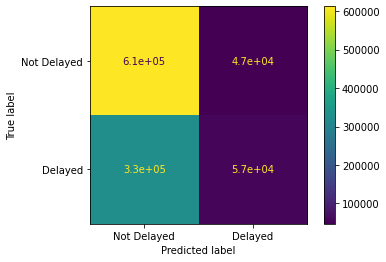

In [45]:
print_results(pipe)

## Model 2: Remove Month Top 25 Airports

In [26]:
# Set up X and y variables for the model

X = delays.drop(columns = ['year',
                           'month',
                           'dep_time', 
                           'dep_delay_new', 
                           'arr_time', 
                           'arr_delay_new', 
                           'actual_elapsed_time', 
                           'carrier_delay', 
                           'weather_delay',
                           'nas_delay',
                           'security_delay',
                           'late_aircraft_delay',
                           'flight_delay'])


y = delays['flight_delay']

In [27]:
# Create train test split on data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

In [29]:
# Set up a pipeline with one hot encoder, standard scaler, logistic regression

pipe_2 = Pipeline([
    ('ohe', OneHotEncoder(handle_unknown = 'ignore')),
    ('sc', StandardScaler(with_mean = False)),
    ('lr', LogisticRegression(max_iter = 1_000))
])

In [30]:
pipe_2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ohe',
                 OneHotEncoder(categories='auto', drop=None,
                               dtype=<class 'numpy.float64'>,
                               handle_unknown='ignore', sparse=True)),
                ('sc',
                 StandardScaler(copy=True, with_mean=False, with_std=True)),
                ('lr',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

Train score: 0.6432507864424418
Test score: 0.6420221635600541
Accuracy score: 0.6420221635600541
              precision    recall  f1-score   support

           0       0.65      0.93      0.77    659542
           1       0.55      0.15      0.23    383341

    accuracy                           0.64   1042883
   macro avg       0.60      0.54      0.50   1042883
weighted avg       0.61      0.64      0.57   1042883



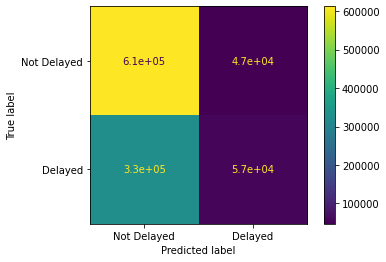

In [41]:
print_results(pipe_2)

## Model 3: Remove Month and Day of Week Top 25 Airports

In [46]:
# Set up X and y variables for the model

X = delays.drop(columns = ['year',
                           'month',
                           'day_of_week',
                           'dep_time', 
                           'dep_delay_new', 
                           'arr_time', 
                           'arr_delay_new', 
                           'actual_elapsed_time', 
                           'carrier_delay', 
                           'weather_delay',
                           'nas_delay',
                           'security_delay',
                           'late_aircraft_delay',
                           'flight_delay'])


y = delays['flight_delay']

In [47]:
# Create train test split on data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

In [49]:
# Set up a pipeline with one hot encoder, standard scaler, logistic regression

pipe_3 = Pipeline([
    ('ohe', OneHotEncoder(handle_unknown = 'ignore')),
    ('sc', StandardScaler(with_mean = False)),
    ('lr', LogisticRegression(max_iter = 1_000))
])

In [50]:
pipe_3.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ohe',
                 OneHotEncoder(categories='auto', drop=None,
                               dtype=<class 'numpy.float64'>,
                               handle_unknown='ignore', sparse=True)),
                ('sc',
                 StandardScaler(copy=True, with_mean=False, with_std=True)),
                ('lr',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

Train score: 0.6409386041118107
Test score: 0.640230975095001
Accuracy score: 0.640230975095001
              precision    recall  f1-score   support

           0       0.65      0.93      0.77    659542
           1       0.54      0.13      0.22    383341

    accuracy                           0.64   1042883
   macro avg       0.60      0.53      0.49   1042883
weighted avg       0.61      0.64      0.56   1042883



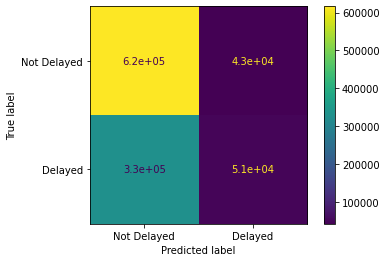

In [51]:
print_results(pipe_3)

## Model 4: Top 100 Airports

In [10]:
# Set up a pipeline with one hot encoder, standard scaler, logistic regression

pipe_4 = Pipeline([
    ('ohe', OneHotEncoder(handle_unknown = 'ignore')),
    ('sc', StandardScaler(with_mean = False)),
    ('lr', LogisticRegression(max_iter = 1_000))
])

In [11]:
pipe_4.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ohe',
                 OneHotEncoder(categories='auto', drop=None,
                               dtype=<class 'numpy.float64'>,
                               handle_unknown='ignore', sparse=True)),
                ('sc',
                 StandardScaler(copy=True, with_mean=False, with_std=True)),
                ('lr',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

Train score: 0.657520346404248
Test score: 0.6569347584845195
Train Accuracy score: 0.657520346404248
Test Accuracy score: 0.6569347584845195
              precision    recall  f1-score   support

           0       0.67      0.94      0.78   1921885
           1       0.56      0.14      0.23   1050057

    accuracy                           0.66   2971942
   macro avg       0.61      0.54      0.50   2971942
weighted avg       0.63      0.66      0.58   2971942



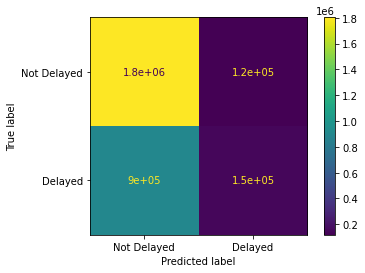

In [20]:
print_results(pipe_4)

## Model 5: Remove Elapsed Time and Distance

In [26]:
# Set up X and y variables for the model

X = delays.drop(columns = ['year',
                           'dep_time', 
                           'dep_delay_new', 
                           'arr_time', 
                           'arr_delay_new',
                           'crs_elapsed_time', 
                           'actual_elapsed_time', 
                           'distance',
                           'carrier_delay', 
                           'weather_delay',
                           'nas_delay',
                           'security_delay',
                           'late_aircraft_delay',
                           'flight_delay'])


y = delays['flight_delay']

In [27]:
# Create train test split on data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

In [28]:
# Set up a pipeline with one hot encoder, standard scaler, logistic regression

pipe_5 = Pipeline([
    ('ohe', OneHotEncoder(handle_unknown = 'ignore')),
    ('sc', StandardScaler(with_mean = False)),
    ('lr', LogisticRegression(max_iter = 1_000))
])

In [29]:
pipe_5.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ohe',
                 OneHotEncoder(categories='auto', drop=None,
                               dtype=<class 'numpy.float64'>,
                               handle_unknown='ignore', sparse=True)),
                ('sc',
                 StandardScaler(copy=True, with_mean=False, with_std=True)),
                ('lr',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

Train score: 0.6547449445514077
Test score: 0.6544135114346108
Train Accuracy score: 0.6547449445514077
Test Accuracy score: 0.6544135114346108
              precision    recall  f1-score   support

           0       0.66      0.95      0.78   1921885
           1       0.55      0.11      0.19   1050057

    accuracy                           0.65   2971942
   macro avg       0.61      0.53      0.48   2971942
weighted avg       0.62      0.65      0.57   2971942



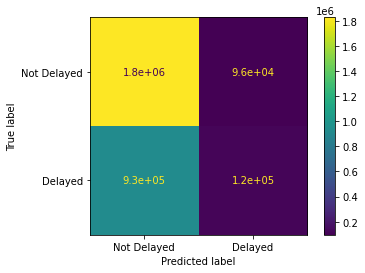

In [30]:
print_results(pipe_5)

# Export Model for Streamlit

In [31]:
with open('./drive/MyDrive/Colab Notebooks/log_reg_pipe.pkl', 'wb') as pickle_out:
    pickle_out = pickle.dump(pipe_5, pickle_out)